In [1]:
!pip install graphviz
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import graphviz

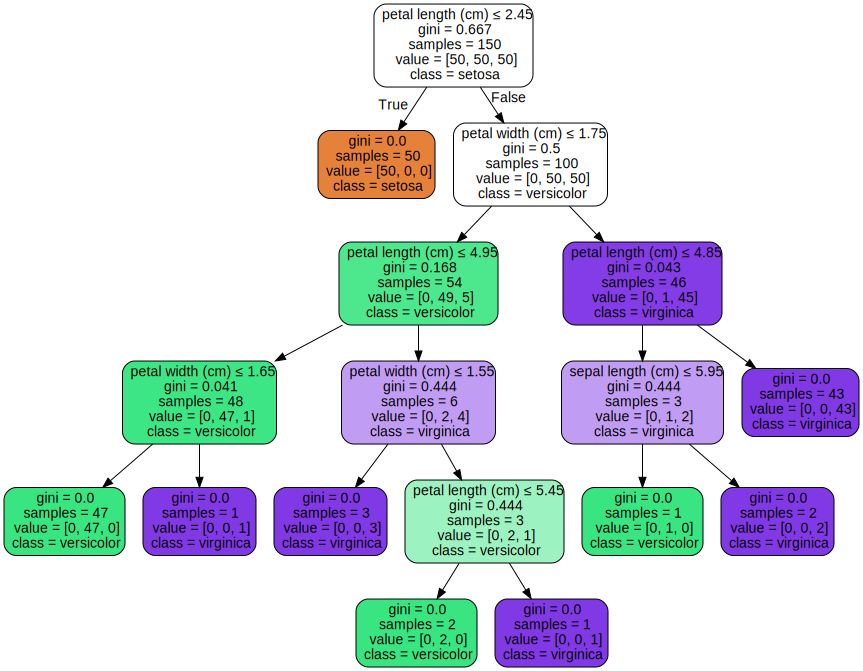

In [3]:
# Load Iris dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the Decision Tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

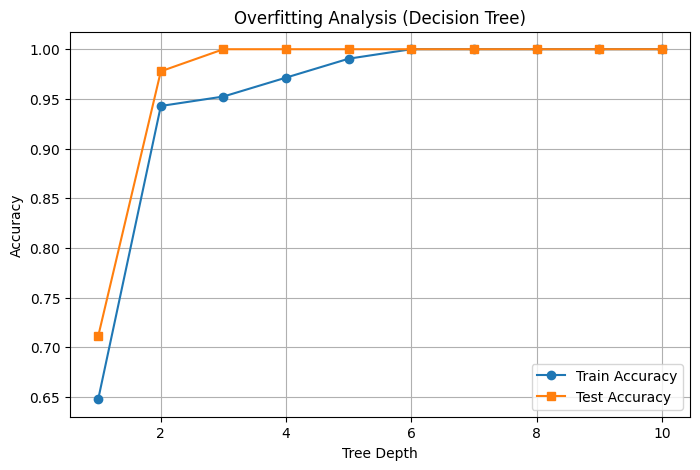

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = range(1, 11)
train_acc, test_acc = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

# Plotting accuracy vs depth
plt.figure(figsize=(8, 5))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracy comparison
dt_test_acc = accuracy_score(y_test, clf.predict(X_test))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Decision Tree Accuracy: {dt_test_acc:.2f}")
print(f"Random Forest Accuracy: {rf_test_acc:.2f}")

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


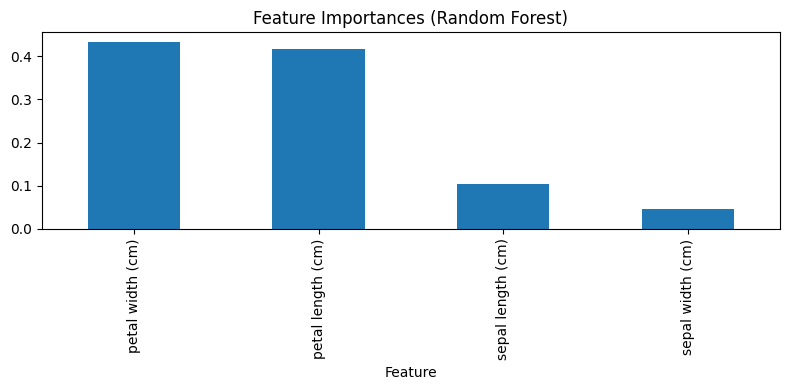

In [6]:
importances = rf.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(importance_df)

# Plot
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False,
                   title='Feature Importances (Random Forest)', figsize=(8,4))
plt.tight_layout()
plt.show()

In [7]:
# CV Score for Decision Tree
dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)

# CV Score for Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)

print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.2f}")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.2f}")

Decision Tree CV Accuracy: 0.95
Random Forest CV Accuracy: 0.97
